数据前几行信息：
数据后几行信息：
数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              4900 non-null   float64
 1   Gender           4900 non-null   object 
 2   Smoking Status   4900 non-null   object 
 3   Lung Capacity    4900 non-null   float64
 4   Disease Type     4900 non-null   object 
 5   Treatment Type   4900 non-null   object 
 6   Hospital Visits  4900 non-null   float64
 7   Recovered        4900 non-null   object 
dtypes: float64(3), object(5)
memory usage: 325.1+ KB
数据描述性统计信息：
数据缺失值信息：
数据前几行信息：
数据缺失值信息：


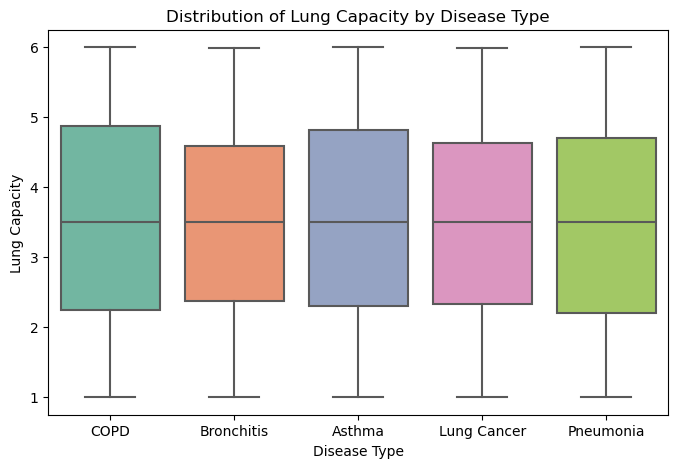

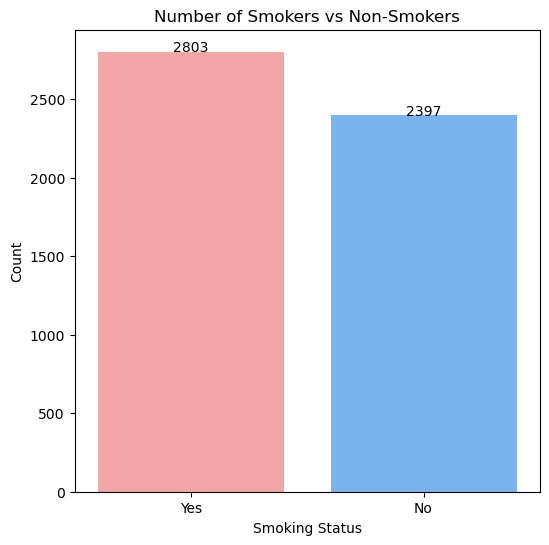

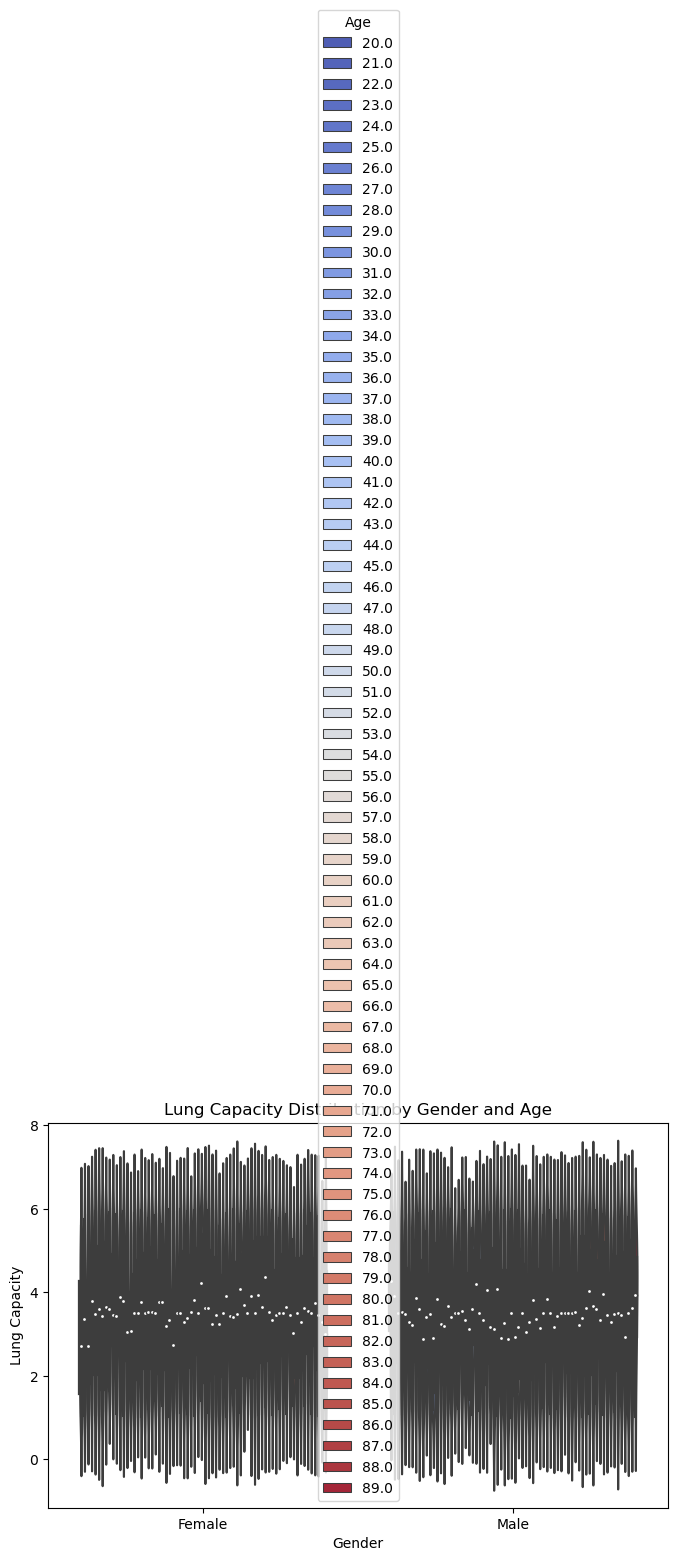

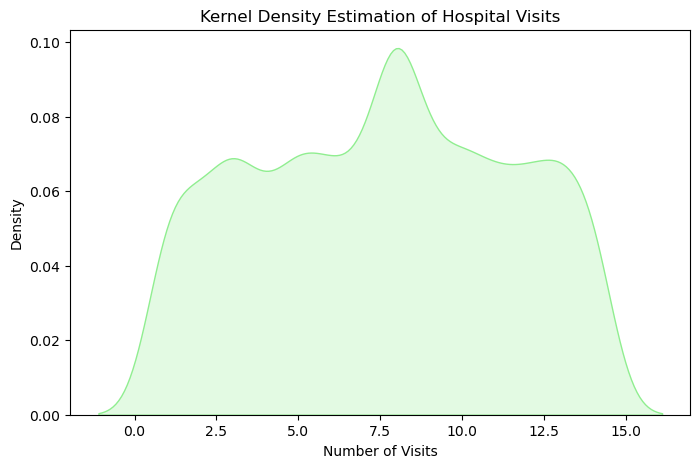

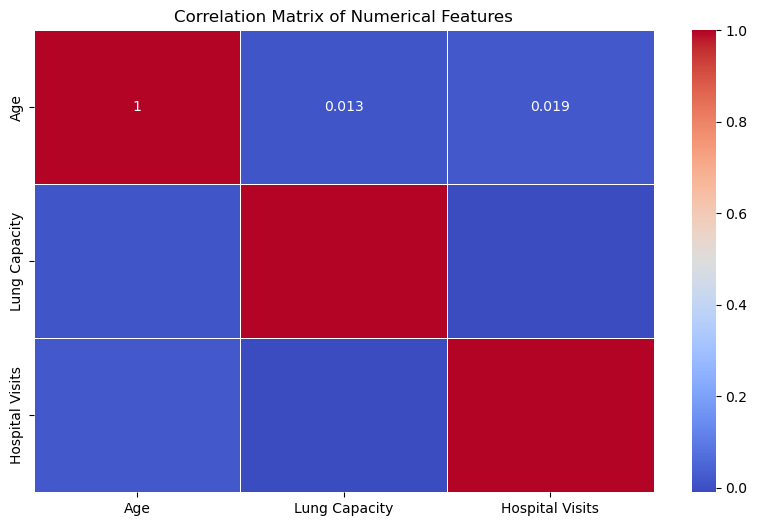

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv(r'C:\Users\22970\Desktop\first homework report\lung_disease_data.csv')
print('数据前几行信息：')
df.head()
print('数据后几行信息：')
df.tail()
print('数据基本信息：')
df.info()
print('数据描述性统计信息：')
df.describe()
print('数据缺失值信息：')
df.isnull().sum()
categorical_columns = ['Gender', 'Smoking Status', 'Disease Type', 'Treatment Type', 'Recovered']
unique_values = {col: df[col].unique() for col in categorical_columns}
df['Lung Capacity'].fillna(df['Lung Capacity'].mean(), inplace=True)
df['Hospital Visits'].fillna(df['Hospital Visits'].median(), inplace=True)
df['Treatment Type'].fillna(df['Treatment Type'].mode()[0], inplace=True)
df['Age'].fillna(df['Age'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Recovered'].fillna(df['Recovered'].mode()[0], inplace=True)
df['Smoking Status'].fillna(df['Smoking Status'].mode()[0], inplace=True)
df['Disease Type'].fillna(df['Disease Type'].mode()[0], inplace=True)
print('数据前几行信息：')
df.head()
print('数据缺失值信息：')
df.isnull().sum()
plt.figure(figsize=(8, 5))
sns.boxplot(x='Disease Type', y='Lung Capacity', data=df, palette='Set2')
plt.title('Distribution of Lung Capacity by Disease Type')
plt.show()
plt.figure(figsize=(6, 6))
smoking_counts = df['Smoking Status'].value_counts()
sns.barplot(x=smoking_counts.index, y=smoking_counts.values, palette=['#FF9999', '#66B2FF'])
for i, v in enumerate(smoking_counts.values):
    plt.text(i, v + 1, str(v), ha='center')
plt.title('Number of Smokers vs Non-Smokers')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()
plt.figure(figsize=(8, 5))
sns.violinplot(x='Gender', y='Lung Capacity', hue='Age', data=df, palette='coolwarm')
plt.title('Lung Capacity Distribution by Gender and Age')
plt.show()
plt.figure(figsize=(8, 5))
sns.kdeplot(df['Hospital Visits'], shade=True, color='lightgreen')
plt.title('Kernel Density Estimation of Hospital Visits')
plt.xlabel('Number of Visits')
plt.ylabel('Density')
plt.show()
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr_numerical = df[numerical_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_numerical, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()